# Extracting test data

In [1]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [2]:
import zipfile
zip_ref = zipfile.ZipFile('/content/target_images-20240701T121219Z-001.zip')
zip_ref.extractall()
zip_ref.close()

In [3]:
alphabets = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']

In [69]:
model = tf.keras.models.load_model('/content/alphabet_recognition.keras')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        640       
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 128)       147584    
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 7, 7, 128)         0         
 g2D)                                                 

In [72]:
img = cv2.imread('/content/target_images/line_1.png' ,cv2.IMREAD_GRAYSCALE)
split = split_image(img)
dark = np.zeros([28,28,1])
(split[1] == dark).all()

True

In [71]:
def split_image(image):
    row, col = image.shape
    n_col = col/28
    n_rows = row/28

    images = []
    for i in range(int(n_rows)):
        for j in range(int(n_col)):
            split = image[i*28:(i+1)*28, j*28:(j+1)*28]
            split = split.reshape(28, 28, 1)
            # split = split
            images.append(split)
            # print(split.shape)

    images = np.array(images)
    return images

In [85]:
X_test = []
for i in range(1,7):

  path = '/content/target_images/line_'+str(i)+'.png'
  img = cv2.imread(path ,cv2.IMREAD_GRAYSCALE)
  splits = split_image(img)
  line = ""
  # print(splits.shape)
  for split in splits:
    im = np.array(split)
    if(split == dark).all():
      line += " "
    else:
      im = im.reshape(1, 28, 28, 1)
      # print(im.shape)
      y_pred = model.predict(im)
      y_pred = np.argmax(y_pred)
      line += (alphabets[y_pred])

  X_test.append(line)



1/1 [==============================] - 0s 39ms/step


In [86]:
X_test

['i am really annoyed by your constant complainiwg and you never ofebr any solutions which is very unhelpful awd negative ',
 'it is frustrating that you never pay attention duzing discussions ano your lack of focus is really affecting our progress         ',
 'i am delighteo by your friendliness and you always make everyone feel welcome which fosters a sense of community        ',
 'it es wonderful that you always show kindness ano your empathy towards others is truly heartwarmint and appreciateo     ',
 'your analysis of the oata was accuraze and well cresented providing a clear unofrstanding of the trends and patterns    ',
 'the meeting minutes yow prepared wbre detailed and well organized accurately reflecting the discussions and decisions made        ']

# Making Sentiment Analysis Model

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding
from keras.layers import LSTM, SimpleRNN
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [5]:
df = pd.read_csv('/content/sentiment_analysis_dataset.csv')
df.head()
X = df['line']
y = df['sentiment']

In [6]:
tokenizer = Tokenizer(filters = '!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~', split = ' ')
tokenizer.fit_on_texts(X)
X = tokenizer.texts_to_sequences(X)
X = pad_sequences(X, maxlen = 50)

In [7]:
dic = {}
i = 0
for out in y.unique():
  dic[out] = i
  i += 1
y = y.replace(dic)
y = keras.utils.to_categorical(y, 3)


In [8]:
len(tokenizer.word_index)
X.shape

(30, 50)

In [118]:
model_lstm = Sequential()
model_lstm.add(Embedding(275, 32, input_length = 50))
model_lstm.add(LSTM(128, dropout = 0.2, recurrent_dropout = 0.2, recurrent_regularizer='l1'))
model_lstm.add(Dense(3, activation = 'softmax'))
model_lstm.compile(loss =  'CategoricalCrossentropy' , optimizer = 'adam', metrics = ['accuracy'])

In [119]:
model_lstm.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_17 (Embedding)    (None, 50, 32)            8800      
                                                                 
 lstm_15 (LSTM)              (None, 128)               82432     
                                                                 
 dense_19 (Dense)            (None, 3)                 387       
                                                                 
Total params: 91619 (357.89 KB)
Trainable params: 91619 (357.89 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [120]:
history = model_lstm.fit(X, y, epochs = 100, validation_split = 0.50)

Epoch 1/100
1/1 [==============================] - 6s 6s/step - loss: 24.2509 - accuracy: 0.4667 - val_loss: 23.6137 - val_accuracy: 0.0667
Epoch 2/100
1/1 [==============================] - 0s 157ms/step - loss: 23.5996 - accuracy: 0.6000 - val_loss: 22.9882 - val_accuracy: 0.0667
Epoch 3/100
1/1 [==============================] - 0s 149ms/step - loss: 22.9584 - accuracy: 0.6667 - val_loss: 22.3767 - val_accuracy: 0.0000e+00
Epoch 4/100
1/1 [==============================] - 0s 157ms/step - loss: 22.3311 - accuracy: 0.6667 - val_loss: 21.7797 - val_accuracy: 0.0000e+00
Epoch 5/100
1/1 [==============================] - 0s 174ms/step - loss: 21.7161 - accuracy: 0.6667 - val_loss: 21.1947 - val_accuracy: 0.0000e+00
Epoch 6/100
1/1 [==============================] - 0s 160ms/step - loss: 21.1142 - accuracy: 0.6667 - val_loss: 20.6228 - val_accuracy: 0.0000e+00
Epoch 7/100
1/1 [==============================] - 0s 154ms/step - loss: 20.5255 - accuracy: 0.6667 - val_loss: 20.0642 - val_acc

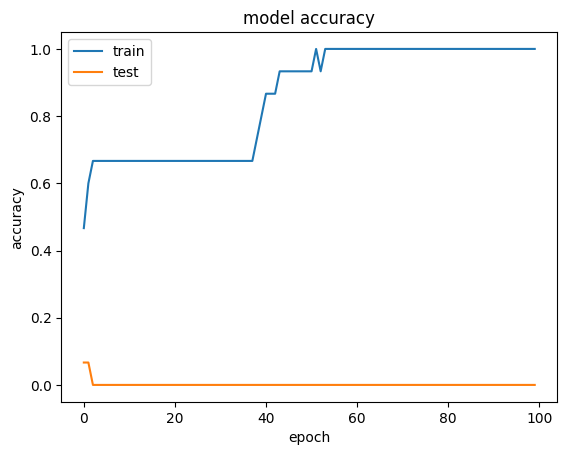

In [121]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

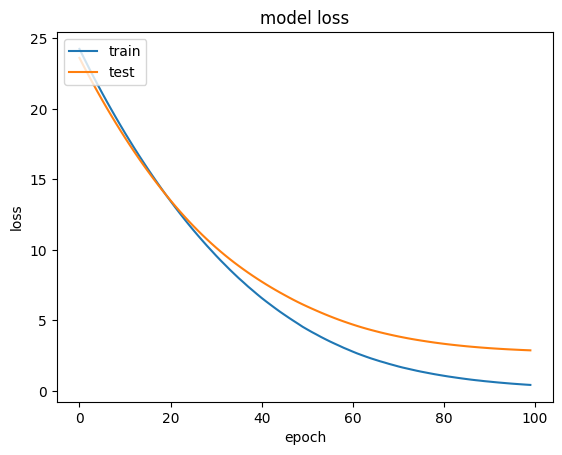

In [122]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

In [87]:
X_test = tokenizer.texts_to_sequences(X_test)
X_test = pad_sequences(X_test, maxlen = 50)

In [123]:
y_pred = np.argmax(model_lstm.predict(X_test), axis = 1)
for i in y_pred:
  print(list(dic.keys())[i])

1/1 [==============================] - 0s 278ms/step
Angry
Angry
Angry
Happy
Happy
Happy


In [90]:
df = pd.read_csv('/content/target_labels.csv')
y_test = df['sentiment']
y_test = y_test.replace(dic)

In [124]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average = 'weighted')

0.4000000000000001